# Analysis and visualization of the results

Importing dependencies

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Analysis of the metadata

##### Analysing percentage of completeness of the metadata

Note: This process was repeated for FIBAO metadata and CNM metadata

In [1097]:
# merged metadata: "/opt/nextstrain/datasets/sars-cov-2-v2/20230518/data/merged_bioinfo_metadata.json"
# fibao metadata 2605 "/home/pmata/prueba_download/merged_metadata_nobio_fibao.json"
# CNM metadata 2827: "/data/bioinfoshare/UCCT_Relecov/COD-2100-MAD-CNM/20220720/bioinfo_processed_converted_metadata_lab.json"

with open("/opt/nextstrain/datasets/sars-cov-2-v2/20230518/data/merged_bioinfo_metadata.json") as file:
    metadatastats = json.load(file)

notprov_counts={}
for sampledict in metadatastats:
    for key,val in sampledict.items():
        if "Not Provided" in val or "None" in val:
            if key in notprov_counts.keys():
                notprov_counts[key]+=1
            else:
                notprov_counts[key]=1
notprov_counts = {x:(notprov_counts[x] if x in notprov_counts.keys() else 0) for x,y in metadatastats[0].items()}
print(len(notprov_counts), len(metadatastats))

127 5432


In [ ]:
# Calculating percentage
notprov_percent = {x : (y/len(metadatastats)) for x,y in notprov_counts.items()}
completefields = [x for x in notprov_percent.keys() if notprov_percent[x] == 0]
print(len(completefields), len(completefields)/len(notprov_percent))

Loading metadata without bioinfo analysis data

In [ ]:
with open("/home/pmata/prueba_download/merged_metadata_nobio_fibao.json") as f:
    metanobio = json.load(f)

Repeating the analysis but using only provided metadata

In [ ]:
notprov_counts={}
for sampledict in metadatastats:
    for key,val in sampledict.items():
        if key in metanobio[0].keys():
            if "Not Provided" in val or "None" in val:
                if key in notprov_counts.keys():
                    notprov_counts[key]+=1
                else:
                    notprov_counts[key]=1
notprov_counts = {x:(notprov_counts[x] if x in notprov_counts.keys() else 0) 
                  for x,y in metadatastats[0].items() if x in metanobio[0].keys()}
notprov_percent = {x : (y/len(metadatastats)) for x,y in notprov_counts.items()}
completefields = [x for x in notprov_percent.keys() if notprov_percent[x] == 0]
print(len(completefields), len(completefields)/len(notprov_percent))

# Analysis of Viralrecon results

In [ ]:
# Small command to save the dataframes into csv
"""ilucsv_fibao.to_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/mapping_illumina_stats.tab", sep="\t", index=False)
varmqc_fibao.to_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/summary_variants_metrics_mqc.csv", index=False)
longtab_fibao.to_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/variants_long_table_20230331.csv", index=False)
"""

Loading the files from viralrecon

In [ ]:
ilucsv_fibao = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/mapping_illumina_stats.tab", sep="\t", engine="pyarrow")
varmqc_fibao = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/summary_variants_metrics_mqc.csv", engine="pyarrow")
longtab_fibao = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230331/variants_long_table_20230331.csv", engine="pyarrow")

In [13]:
ilucsv_fibao2 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230420/mapping_illumina_stats.tab", sep="\t", engine="pyarrow")
varmqc_fibao2 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230420/summary_variants_metrics_mqc.csv", engine="pyarrow")
longtab_fibao2 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2129-AND-FIBAO/20230420/variants_long_table_20230508.csv", engine="pyarrow")

longtab_fibao2["LINEAGE"].unique()

array(['B.1.1.7', 'B.1.177', 'B.1.177.69', 'B.1.177.63', 'B.1.177.58',
       'B.1.1', 'B.1.177.53', 'B.1.160', 'B.1.177.10', 'B.1', 'A.23.1',
       'B.1.160.28', 'B.1.575.1', 'B.1.111', 'A.21', 'B.1.351',
       'B.1.177.32', 'Q.1', 'B.1.1.519', 'B.1.1.420', 'B.1.258', 'P.1',
       'B.1.1.318', 'B.1.621', 'B.1.525', 'B.1.575', 'C.36.3',
       'B.1.1.348', 'B.1.319', 'B.1.526', 'C.37', 'B.1.617.2', 'P.1.17',
       'B.1.351.5'], dtype=object)

Cleaning columns were decimal numbers used comma instead of dot

In [156]:
ilucsv_mad07 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2100-MAD-CNM/20220720/mapping_illumina_stats.tab", sep="\t", engine="pyarrow")
varmqc_mad07 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2100-MAD-CNM/20220720/summary_variants_metrics_mqc.csv", engine="pyarrow")
longtab_mad07 = pd.read_csv("/data/bioinfoshare/UCCT_Relecov/COD-2100-MAD-CNM/20220720/variants_long_table_20220705.csv", engine="pyarrow")

for col in ilucsv_mad07.columns:
    if ilucsv_mad07[col].dtype == object:
        ilucsv_mad07[col] = ilucsv_mad07[col].str.replace(',', '.')

Merge the data from all the samples

In [455]:
merged_ilucsv = pd.concat([ilucsv_fibao, ilucsv_fibao2, ilucsv_mad07])
merged_ilucsv = merged_ilucsv.reset_index(drop=True)

merged_varmqc = pd.concat([varmqc_fibao, varmqc_fibao2, varmqc_mad07])
merged_varmqc = merged_varmqc.reset_index(drop=True)

merged_longtab = pd.concat([longtab_fibao, longtab_fibao2, longtab_mad07])
merged_longtab = merged_longtab.reset_index(drop=True)


In [158]:
# generate a copy of the dataframe to keep the original intact
merged_longtab_pob = merged_longtab.copy()

In [293]:
merged_longtab_pob

,SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER,LINEAGE,Pop_AF
0,AND00001,NC_045512.2,11287,GTCTGGTTTT,G,PASS,6189,6185,4939,0.80,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,B.1.1.7,0.871386
1,AND00005,NC_045512.2,11287,GTCTGGTTTT,G,PASS,4636,4615,4302,0.93,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,B.1.1.7,0.871386
2,AND00011,NC_045512.2,11287,GTCTGGTTTT,G,PASS,5379,5360,4890,0.91,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,B.1.1.7,0.871386
3,AND00013,NC_045512.2,11287,GTCTGGTTTT,G,PASS,6405,6378,5678,0.89,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,B.1.1.7,0.871386
4,AND00014,NC_045512.2,11287,GTCTGGTTTT,G,PASS,5068,5042,4695,0.93,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,B.1.1.7,0.871386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196025,220757,NC_045512.2,24763,T,C,PASS,599,6,593,0.99,S,synonymous_variant,c.3201T>C,p.Tyr1067Tyr,p.Y1067Y,ivar,AY.43,0.985000
196026,220758,NC_045512.2,24763,T,C,PASS,606,10,596,0.98,S,synonymous_variant,c.3201T>C,p.Tyr1067Tyr,p.Y1067Y,ivar,AY.43,0.985000
196027,220757,NC_045512.2,27568,TTTAGCACTCAATTTGCTTTTGC,T,PASS,146,144,108,0.74,ORF7a,frameshift_variant,c.178_199delAGCACTCAATTTGCTTTTGCTT,p.Ser60fs,p.S60fs,ivar,AY.43,0.690000
196028,220758,NC_045512.2,27568,TTTAGCACTCAATTTGCTTTTGC,T,PASS,306,297,196,0.64,ORF7a,frameshift_variant,c.178_199delAGCACTCAATTTGCTTTTGCTT,p.Ser60fs,p.S60fs,ivar,AY.43,0.690000


# Analysis of illumina mapping stats file

[Text(0, 0.0, ''),
 Text(0, 10.0, ''),
 Text(0, 20.0, ''),
 Text(0, 30.0, ''),
 Text(0, 40.0, ''),
 Text(0, 50.0, '')]

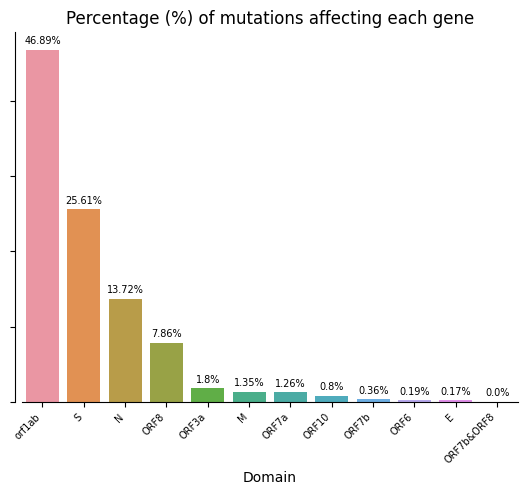

In [915]:
genecounts = merged_longtab_pob[merged_longtab_pob["AF"]>=0.75]["GENE"].value_counts()
effectcounts = merged_longtab_pob[merged_longtab_pob["AF"]>=0.75]["EFFECT"].value_counts()
percentgene = genecounts/genecounts.sum() * 100
genedict={}



sorted_index = percentgene.sort_values(ascending=False).index

ax = sns.barplot(x=percentgene.index, y=percentgene, order=sorted_index)
ax.set(title="Percentage (%) of mutations affecting each gene", xlabel="Domain", ylabel="")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_yticklabels([])

for i, v in enumerate(percentgene):
    ax.text(i, float("{:.2f}".format(v+0.75)), str(str(float("{:.2f}".format(v)))+"%"),
            ha='center', fontsize=7)
ax.set_yscale('linear')

ax.spines['left'].set_position(('outward', 5))
sns.despine(top=True)
ax.set_yticklabels([])


In [1093]:
merged_longtab_pob["LINEAGE"].unique()

array(['B.1.1.7', 'B.1.177.69', 'B.1.1', 'B.1', 'B.1.351', 'Q.1', 'P.1',
       'B.1.1.318', 'B.1.525', 'B.1.319', 'B.1.526', 'C.37', 'P.1.17',
       'B.1.351.5', 'Q.4', 'Unassigned', 'P.1.2', 'B.1.637', 'P.1.16',
       'C.37.1', 'B.1.177', 'B.1.160', 'B.1.221', 'B.1.575', 'B.1.177.63',
       'B.1.177.58', 'B.1.177.53', 'B.1.177.10', 'B.1.160.28',
       'B.1.575.1', 'B.1.111', 'B.1.177.32', 'B.1.1.519', 'B.1.1.420',
       'B.1.258', 'B.1.621', 'C.36.3', 'B.1.1.348', 'B.1.617.2',
       'BA.1.17', 'BA.1.18', 'BA.1.1.1', 'BA.1.1', 'BA.1', 'BA.1.15.1',
       'AY.127', 'B.1.177.57', 'B.1.177.43', 'B.1.1.274', 'B.1.480',
       'B.1.311', 'B.1.177.24', 'B.1.177.44', 'B.1.177.49', 'B.1.177.17',
       'B.1.1.269', 'B.1.177.51', 'B.1.258.14', 'C.36', 'B.1.1.14',
       'B.1.177.61', 'R.1', 'B.1.36', 'P.2', 'B.1.429', 'AY.53', 'AY.5',
       'B.1.621.1', 'AY.33', 'AY.4', 'AY.124', 'AY.122', 'AY.43', 'AY.26',
       'AY.70', 'AY.5.5', 'AY.71', 'AY.5.1', 'AY.7', 'AY.9.2', 'AY.45',
       '

ANALYSIS OF THE METADATA MERGING METADATA INTO DATAFRAME

In [ ]:
with open("/opt/nextstrain/datasets/sars-cov-2-v2/20230511/data/merged_bioinfo_processed_metadata.json") as file:
    merg_bioinfo = json.load(file)
samplesource={}
for x in merg_bioinfo:
    samplesource[x["isolate_sample_id"]] = x["collecting_institution"]

keys_to_keep = set(merged_ilucsv['sample']).intersection(samplesource.keys())

filteredsource = {k:v for k,v in samplesource.items() if k in keys_to_keep}

merged_ilucsv['collecting_institution'] = merged_ilucsv['sample'].map(filteredsource)


In [ ]:
for val in [x for x,y in enumerate(merged_ilucsv["Coverage>10x(%)"]) if y=="-"]:
    merged_ilucsv = merged_ilucsv.drop(index=val)
merged_ilucsv.reset_index(drop=True)

merged_ilucsv["Coverage>10x(%)"] = merged_ilucsv["Coverage>10x(%)"].astype(float)

In [585]:
samplesex={}
for x in merg_bioinfo:
    samplesex[x["isolate_sample_id"]] = x["host_gender"]

keys_to_keep = set(merged_ilucsv['sample']).intersection(samplesex.keys())

filteredsex= {k:v for k,v in samplesex.items() if k in keys_to_keep}

merged_ilucsv['host_gender'] = merged_ilucsv['sample'].map(filteredsex)

In [583]:
samplelibrary={}
for x in merg_bioinfo:
    samplelibrary[x["isolate_sample_id"]] = x["library_preparation_kit"]

keys_to_keeplib = set(merged_ilucsv['sample']).intersection(samplelibrary.keys())

filteredlib= {k:v for k,v in samplelibrary.items() if k in keys_to_keep}

merged_ilucsv['library_prep_kit'] = merged_ilucsv['sample'].map(filteredlib)

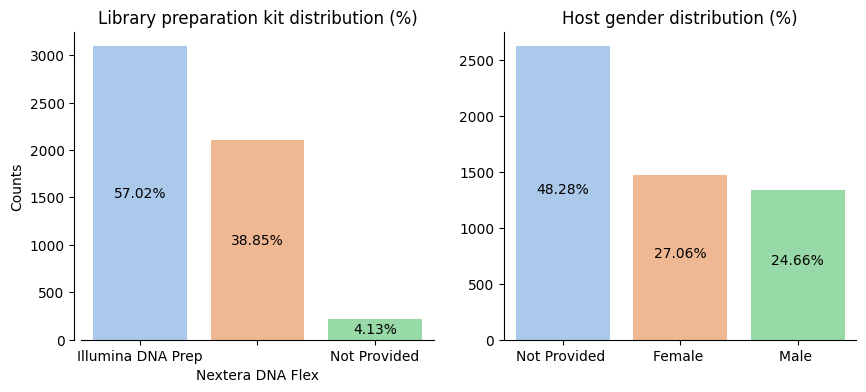

In [607]:
merged_ilucsv['library_prep_kit'] = merged_ilucsv['library_prep_kit'].str.replace(r'\s*\[.*?\]', '', regex=True)
libcounts = merged_ilucsv["library_prep_kit"].value_counts()
percentlib = libcounts/libcounts.sum() * 100
sorted_indexsex = percentlib.sort_values(ascending=False).index

merged_ilucsv['host_gender'] = merged_ilucsv['host_gender'].str.replace(r'\[.*?\]', '', regex=True)
sexcounts = merged_ilucsv["host_gender"].value_counts()
percentsex = sexcounts/sexcounts.sum() * 100
sorted_indexsex = percentsex.sort_values(ascending=False).index

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

sns.barplot(x=percentlib.index, y=libcounts, ax=ax1)
ax1.set(xlabel="", ylabel="Counts")
ax1.set_title(label="Library preparation kit distribution (%)", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)
ax1.get_xticklabels()[1].set_y(-0.06)

for i, v in enumerate(libcounts):
    ax1.text(i, float("{:.2f}".format(v/2 - 50)), str(str(float("{:.2f}".format(percentlib[i])))+"%"),
            ha='center', fontsize=10)
ax1.set_yscale('linear')

ax1.spines['left'].set_position(('outward', 5))
sns.despine(top=True)
###--------------------------------------------------------
sns.barplot(x=percentsex.index, y=sexcounts, ax = ax2)
ax2.set(xlabel="", ylabel="")
ax2.set_title(label="Host gender distribution (%)", fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=10)

for i, v in enumerate(sexcounts):
    ax2.text(i, float("{:.2f}".format(v/2)), str(str(float("{:.2f}".format(percentsex[i])))+"%"),
            ha='center', fontsize=10)

sns.despine(ax=ax2, top=True)

plt.show()

In [ ]:
sampleallkit={}
for x in merg_bioinfo:
    sampleallkit[x["isolate_sample_id"]] = x["all_in_one_library_kit"]

keys_to_keepallkit = set(merged_ilucsv['sample']).intersection(sampleallkit.keys())

filteredallkit= {k:v for k,v in sampleallkit.items() if k in keys_to_keepallkit}

merged_ilucsv['all_in_one_library_kit'] = merged_ilucsv_host['sample'].map(filteredallkit)

merged_ilucsv["all_in_one_library_kit"] = merged_ilucsv_host["all_in_one_library_kit"].str.replace(r'\[.*?\]', '', regex=True)
allkitcounts = merged_ilucsv["all_in_one_library_kit"].value_counts()
percentallkit = allkitcounts/allkitcounts.sum() * 100
sorted_indexsex = percentallkit.sort_values(ascending=False).index

In [560]:
samplespec={}
for x in merg_bioinfo:
    samplespec[x["isolate_sample_id"]] = x["enrichment_panel_version"]

keys_to_keepspec = set(merged_ilucsv['sample']).intersection(samplespec.keys())

filteredspec= {k:v for k,v in samplespec.items() if k in keys_to_keepspec}

merged_ilucsv['enrichment_panel_version'] = merged_ilucsv['sample'].map(filteredspec)

In [626]:
samplesanat={}
for x in merg_bioinfo:
    samplesanat[x["isolate_sample_id"]] = x["sequencing_instrument_model"]

keys_to_keepanat = set(merged_ilucsv['sample']).intersection(samplesanat.keys())

filteredanat= {k:v for k,v in samplesanat.items() if k in keys_to_keepanat}

merged_ilucsv['sequencing_instrument_model'] = merged_ilucsv['sample'].map(filteredanat)

In [ ]:
merged_ilucsv['sequencing_instrument_model'] = merged_ilucsv['sequencing_instrument_model'].str.replace(r'\[.*?\]', '', regex=True)
seqcounts = merged_ilucsv["sequencing_instrument_model"].value_counts()
percentseq = seqcounts/seqcounts.sum() * 100
sorted_indexseq = percentseq.sort_values(ascending=False).index


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.barplot(x=percentlib.index, y=libcounts, ax=ax1)
ax1.set(xlabel="", ylabel="Counts")
ax1.set_title(label="Library preparation kit distribution", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)
ax1.get_xticklabels()[1].set_y(-0.06)

for i, v in enumerate(libcounts):
    ax1.text(i, float("{:.2f}".format(v/2 - 50)), str(str(float("{:.2f}".format(percentlib[i])))+"%"),
            ha='center', fontsize=10)
ax1.set_yscale('linear')

ax1.spines['left'].set_position(('outward', 5))
sns.despine(ax=ax1, top=True)

###-------------------------------------------------------- 2222222
sns.barplot(x=percentallkit.index, y=allkitcounts, ax = ax2)
ax2.set(xlabel="", ylabel="Counts")
ax2.set_title(label="All-in-one library kit distribution", fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=10)
ax2textvals = [95.87, 4.13]
for i, v in enumerate(allkitcounts):
    ax2.text(i, float("{:.2f}".format(v/2 - 80)), str(str(float("{:.2f}".format(ax2textvals[i])))+"%"),
            ha='center', fontsize=10)

sns.despine(ax=ax2, top=True)

#### ------------------------ 33333333333333
sns.barplot(x=percentspec.index, y=speccounts, ax=ax3)
ax3.set(xlabel="", ylabel="Counts")
ax3.set_title(label="Enrichment panel distribution", fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=10)

ax3.text(0, float("{:.2f}".format(speccounts[0]/2)), str(str(float("{:.2f}".format(percentspec[0])))+"%"),
            ha='center', fontsize=10)
ax3.text(1, float("{:.2f}".format(speccounts[1]+50)), str(str(float("{:.2f}".format(percentspec[1])))+"%"),
            ha='center', fontsize=10)
ax3.text(2, float("{:.2f}".format(speccounts[2]+50)), str(str(float("{:.2f}".format(percentspec[2])))+"%"),
            ha='center', fontsize=10)
    
ax3.set_yscale('linear')

ax3.spines['left'].set_position(('outward', 5))
sns.despine(ax=ax3, top=True)

###--------------------- 44444444
sns.barplot(x=percentseq.index, y=seqcounts, ax=ax4)
ax4.set(xlabel="", ylabel="Counts")
ax4.set_title(label="Sequencing instrument distribution", fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=10)

for i, v in enumerate(seqcounts):
    ax4.text(i, float("{:.2f}".format(v/2 - 20)), str(str(float("{:.2f}".format(percentseq[i])))+"%"),
            ha='center', fontsize=10)
    
labels = ax4.get_xticklabels()
for i, label in enumerate(labels):
    if i % 2 == 1:
        label.set_y(-0.06)
    
ax4.set_yscale('linear')

ax4.spines['left'].set_position(('outward', 5))
sns.despine(ax=ax4, top=True)

fig.tight_layout()

plt.show()

## TIME DISTRIBUTION

In [839]:
samplesdate = {}
dateilucsv = merged_ilucsv.copy()
for x in merg_bioinfo:
    samplesdate[x["isolate_sample_id"]] = x["sample_collection_date"]

keys_to_keepdate = set(dateilucsv['sample']).intersection(samplesdate.keys())

filteredate= {k:v for k,v in samplesdate.items() if k in keys_to_keepdate}

dateilucsv['sample_collection_date'] = dateilucsv['sample'].map(filteredate)


In [840]:
dateilucsv["sample_collection_date"] = pd.to_datetime(dateilucsv["sample_collection_date"],
                                                      errors='coerce')
dateilucsv.dropna(subset=["sample_collection_date"], inplace=True)

grouped_dateilucsv = dateilucsv.groupby(['Lineage', pd.Grouper(key='sample_collection_date', freq='W')]).size().reset_index(name='count')

In [841]:
dateilucsv["month"] = dateilucsv["sample_collection_date"].dt.to_period("M") 

In [864]:
dateilucsv[dateilucsv["sample_collection_date"] <= pd.to_datetime("2020-01-01")]


,run,user,host,Virussequence,sample,totalreads,readshostR1,readshost,%readshost,readsvirus,...,analysis_date,analysis date,collecting_institution,host_gender,library_prep_kit,specimen_source,enrichment_panel_version,sequencing_instrument_model,sample_collection_date,month
2634,MiSeq_GEN_195_20210113_ICasas,RELECOV,Human,NC_045512.2,210234,54078,6994,13988,25.87,39719,...,NaN,20220705.0,Hospital General Universitario Morales Meseguer,Female,Illumina DNA Prep,Nasopharynx Swabbing,ARTIC v2,Illumina MiSeq,1972-01-16,1972-01-01
4633,MiSeq_GEN_195_20210113_ICasas,RELECOV,Human,NC_045512.2,216351,1511446,24153,48306,3.20,1448156,...,NaN,20220705.0,Hospital Universitario Reina Sofia,Female,Illumina DNA Prep,Nasopharynx Swabbing,ARTIC v3,Illumina NextSeq 500,2010-06-21,2010-06-01
4634,MiSeq_GEN_195_20210113_ICasas,RELECOV,Human,NC_045512.2,216353,1327792,1588,3176,0.24,1317565,...,NaN,20220705.0,Hospital Universitario Reina Sofia,Male,Illumina DNA Prep,Nasopharynx Swabbing,ARTIC v3,Illumina NextSeq 500,2010-06-21,2010-06-01
5104,MiSeq_GEN_195_20210113_ICasas,RELECOV,Human,NC_045512.2,217390,1080930,240,480,0.04,1044842,...,NaN,20220705.0,Hospital General Universitario Santa Lucia,Male,Illumina DNA Prep,Nasopharynx Swabbing,ARTIC v3,Illumina NextSeq 500,1992-08-19,1992-08-01
5373,MiSeq_GEN_195_20210113_ICasas,RELECOV,Human,NC_045512.2,219851,457828,565,1130,0.25,456426,...,NaN,20220705.0,Hospital de Mostoles,Female,Illumina DNA Prep,Nasopharynx Swabbing,ARTIC v4,Illumina MiSeq,1990-07-21,1990-07-01


In [856]:
dateilucsv["month"] = dateilucsv["month"].dt.to_timestamp()

Text(0.5, 1.0, 'Collection date distribution')

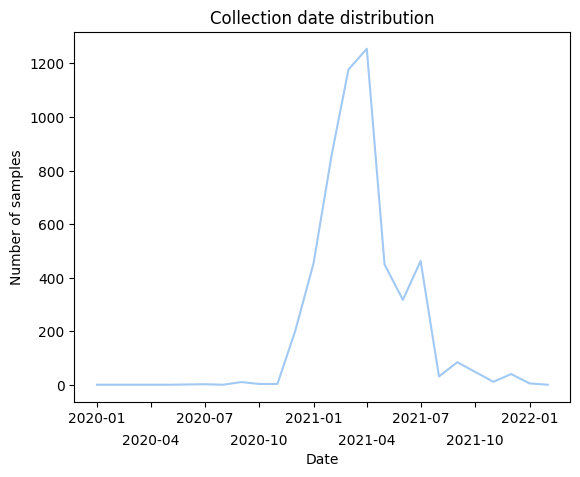

In [859]:
countmonths = dateilucsv.groupby("month").size().reset_index(name='count')
countmonths = countmonths[countmonths["month"] >= pd.to_datetime("2019-01")]
#sns.barplot(x=countweeks.index, y=countweeks)
axdate = sns.lineplot(data=countmonths, x="month", y="count")

labelsdate = axdate.get_xticklabels()
for i, label in enumerate(labelsdate):
    if i % 2 == 1:
        label.set_y(-0.06)

plt.xlabel('Date')
plt.ylabel('Number of samples')
plt.title('Collection date distribution')


/tmp/ipykernel_23304/1453054045.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



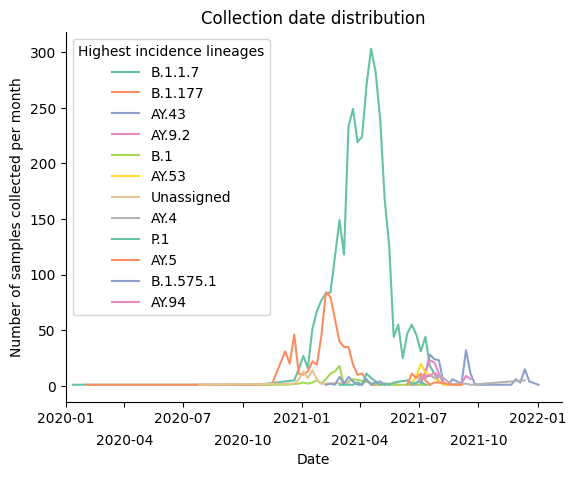

In [886]:
start_date = pd.to_datetime('2020-01-01')
filtered_dateilu = grouped_dateilucsv[(grouped_dateilucsv['sample_collection_date'] >= start_date)]

lineagecounts = merged_ilucsv["Lineage"].value_counts()
percentlineage = lineagecounts/lineagecounts.sum() * 100
filtered_dateilu["percentage_lineage"] = filtered_dateilu["Lineage"].map(percentlineage)

filtered_dateilu2 = filtered_dateilu[filtered_dateilu["percentage_lineage"] >= 0.75]
filtered_dateilu2 = filtered_dateilu2.sort_values("percentage_lineage", ascending=False)

axdate = sns.lineplot(data=filtered_dateilu2, x='sample_collection_date',
                       y="count", hue="Lineage", palette="Set2")

axdate.set_xlim(start_date)

labelsdate = axdate.get_xticklabels()
for i, label in enumerate(labelsdate):
    if i % 2 == 1:
        label.set_y(-0.06)

plt.legend(title="Highest incidence lineages")

#axdate.set_prop_cycle(color=dict(zip(filtered_labels, filtered_handles)))

plt.xlabel('Date')
plt.ylabel('Number of samples collected per month')
plt.title('Collection date distribution')
sns.despine(top=True)
# Display the plot
plt.show()

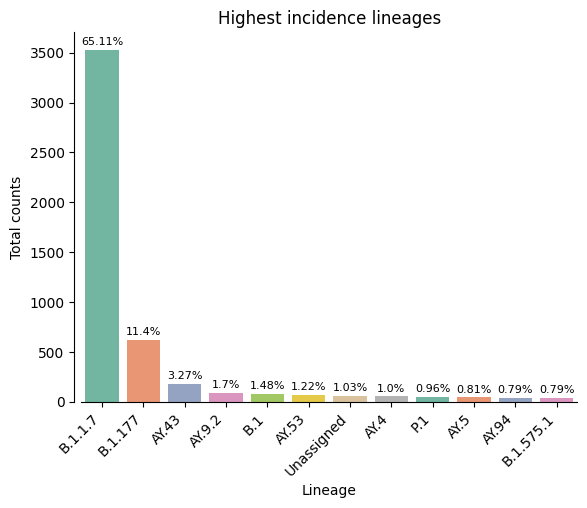

In [912]:
lineagecounts = merged_ilucsv["Lineage"].value_counts()
percentlineage = lineagecounts/lineagecounts.sum() * 100
percentlineage = percentlineage[percentlineage>=0.75]
sorted_index2 = lineagecounts.sort_values(ascending=False).index

ax = sns.barplot(x=lineagecounts.index[0:12], y=lineagecounts[0:12],
                 palette="Set2")
ax.set(title="Highest incidence lineages", xlabel="Lineage", ylabel="Total counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels([])

for i, v in enumerate(lineagecounts[0:12]):
    ax.text(i, float("{:.2f}".format(v+50)), str(str(float("{:.2f}".format(percentlineage[i])))+"%"),
            ha='center', fontsize=8)
ax.set_yscale('linear')

ax.spines['left'].set_position(('outward', 5))
sns.despine(top=True)

In [ ]:
merged_ilucsv_host = pd.concat([ilucsv_fibao, ilucsv_fibao2, ilucsv_mad07])
merged_ilucsv_host = merged_ilucsv.reset_index(drop=True)



In [ ]:
samplesex={}
for x in merg_bioinfo:
    samplesex[x["isolate_sample_id"]] = x["host_gender"]

keys_to_keep = set(merged_ilucsv_host['sample']).intersection(samplesex.keys())

filteredsex = {k:v for k,v in samplesex.items() if k in keys_to_keep}

merged_ilucsv_host['host_gender'] = merged_ilucsv_host['sample'].map(filteredsex)

sampleage={}
for x in merg_bioinfo:
    sampleage[x["isolate_sample_id"]] = x["host_age"]

keys_to_keep = set(merged_ilucsv_host['sample']).intersection(samplesex.keys())

filteredsex = {k:v for k,v in samplesex.items() if k in keys_to_keep}

merged_ilucsv_host['host_age'] = merged_ilucsv_host['sample'].map(filteredsex)

samplesource={}
for x in merg_bioinfo:
    samplesource[x["isolate_sample_id"]] = x["specimen_source"]

keys_to_keep = set(merged_ilucsv_host['sample']).intersection(samplesex.keys())

filteredsex = {k:v for k,v in samplesex.items() if k in keys_to_keep}

merged_ilucsv_host['host_age'] = merged_ilucsv_host['sample'].map(filteredsex)

# Analysis of the mutation distribution

In [1050]:
merged_longtab_pob_geneS = merged_longtab_pob[(merged_longtab_pob["POS"] >= 21563) & 
                   (merged_longtab_pob["POS"] <= 25384) &
                   (merged_longtab_pob["AF"] >= 0.75)]
ranges=( [22517,23185], [21595, 22473],[24008,24073],[24065,24127],[24008,25381],[22400,22465], [21602,23617], [23618,25381])
domains=["S1-RBD","S1-NTD","S2-FP1","S2-FP2","S2-S2'","S1-SAg", "S1","S2"]
def assign_category(value):
    for i, (lower_bound, upper_bound) in enumerate(ranges):
        if lower_bound <= value <= upper_bound:
            return domains[i]
    return None 

merged_longtab_pob_geneS["DOMAIN"] = merged_longtab_pob_geneS["POS"].apply(assign_category)

/tmp/ipykernel_23304/1845724927.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [983]:
merged_longtab_pob_geneS = merged_longtab_pob_geneS.reset_index(drop=True)

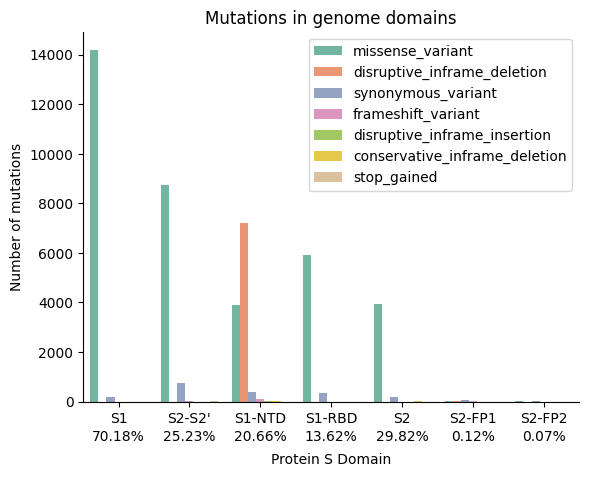

In [1055]:
domaincounts = pd.DataFrame({'Domain': merged_longtab_pob_geneS["DOMAIN"],
                   'Effect': merged_longtab_pob_geneS["EFFECT"]})

# Group the data by category1 and count occurrences of category2
grouped_counts = domaincounts.groupby('Domain')['Effect'].value_counts().unstack()

grouped_counts = grouped_counts.reset_index()

# Melt the dataframe to reshape it for seaborn's barplot
melted_df = pd.melt(grouped_counts, id_vars='Domain', var_name='Effect', value_name='count')
melted_df = melted_df.sort_values("count", ascending=False)
total_counts = melted_df.groupby('Domain')['count'].sum()
total_counts = total_counts.sort_values(ascending=False)
total_counts["S1"] = total_counts["S1"]+total_counts["S1-RBD"]+total_counts["S1-NTD"]
total_counts["S2"] = total_counts["S2"]+total_counts["S2-S2'"]+total_counts["S2-FP1"]+total_counts["S2-FP2"]
melted_df['percentage'] = melted_df.apply(lambda row: row['count'] / total_counts[row['Domain']] * 100, axis=1)


# Plot the grouped bar plot
axdoms = sns.barplot(data=melted_df, x='Domain', y='count', hue='Effect', palette="Set2")

#grouped_counts.plot(grouped_counts, stacked=True)
for i, count in enumerate(total_counts):
    axdoms.text(i, -1700, f"{count / melted_df['count'].sum() * 100:.2f}%", ha='center', va='bottom')

axdoms.legend(loc='upper right', bbox_to_anchor=(1, 1.0))
axdoms.set_xlabel('Protein S Domain', labelpad=20)
sns.despine(ax=axdoms, top=True)

plt.ylabel('Number of mutations')
plt.title('Mutations in genome domains')
plt.show() 

In [1062]:
merged_longtab_pob_geneS["EFFECT"].value_counts()

EFFECT
missense_variant                 36815
disruptive_inframe_deletion       7211
synonymous_variant                1876
frameshift_variant                 110
disruptive_inframe_insertion         6
conservative_inframe_deletion        3
stop_gained                          1
Name: count, dtype: int64

In [1073]:
7211/46022

0.15668593281474077

In [1080]:
merged_longtab_pob_geneS["EFFECT"].value_counts().keys()

'missense_variant'

In [1083]:
domaincounts.value_counts()

Domain  Effect                       
S1      missense_variant                 14202
S2-S2'  missense_variant                  8730
S1-NTD  disruptive_inframe_deletion       7210
S1-RBD  missense_variant                  5909
S2      missense_variant                  3953
S1-NTD  missense_variant                  3874
S2-S2'  synonymous_variant                 745
S1-NTD  synonymous_variant                 379
S1-RBD  synonymous_variant                 342
S1      synonymous_variant                 174
S2      synonymous_variant                 162
S1-NTD  frameshift_variant                 106
S2-FP1  synonymous_variant                  51
S2-FP2  synonymous_variant                  19
        missense_variant                    11
S1-NTD  disruptive_inframe_insertion         6
S2-FP1  missense_variant                     4
S2-S2'  frameshift_variant                   3
S1-NTD  conservative_inframe_deletion        2
S2      conservative_inframe_deletion        1
S2-FP1  disruptive_inf

In [1023]:
total_counts.sort_values(ascending=False)[1:5]

Domain
S2p    9566.0
RBD    6251.0
S2     4116.0
SAg      68.0
Name: count, dtype: float64

In [1026]:
total_counts["S1"]

25861.0

In [1054]:
total_counts

Domain
S1        14376.0
S1-NTD    11577.0
S2-S2'     9479.0
S1-RBD     6251.0
S2         4116.0
S2-FP1       57.0
S2-FP2       30.0
Name: count, dtype: float64

## Quality metrics of WGS analysis

In [354]:
merged_varmqc['# Ns per 100kb consensus'] = merged_varmqc['# Ns per 100kb consensus'].astype(str)


,Sample,# Input reads,# Trimmed reads (fastp),% Non-host reads (Kraken 2),% Mapped reads,# Mapped reads,# Trimmed reads (iVar),Coverage median,% Coverage > 1x,% Coverage > 10x,# SNPs,# INDELs,# Missense variants,# Ns per 100kb consensus,Pangolin lineage,Nextclade clade
0,AND00001,1197680,1197198,100.0,99.99,1197099,1195803,4769,100.0,100.0,28,4.0,20,284.40,None,20I
1,AND00002,1075842,1075476,100.0,99.99,1075400,1074476,4608,100.0,99.0,19,NaN,12,963.11,None,20E
2,AND00003,1187292,1186916,99.999663,100.0,1186858,1185843,4676,100.0,100.0,20,NaN,13,381.23,None,20E
3,AND00004,1130610,1130228,100.0,99.99,1130157,1129052,4853,100.0,99.0,20,NaN,13,688.89,None,20E
4,AND00005,1221796,1221380,99.999836,99.99,1221308,1220397,4857,100.0,100.0,27,4.0,20,274.39,None,20I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,2110173,1460386,1150596,None,None,None,None,None,None,None,None,None,None,4673.80,None,None
2823,2110174,1529830,1190920,None,None,None,None,None,None,None,None,None,None,7154.80,None,None
2824,2110175,1562000,1213480,None,None,None,None,None,None,None,None,None,None,4161.09,None,None
2825,2110180,1589068,1230250,None,None,None,None,None,None,None,None,None,None,4238.03,None,None


In [343]:
merged_varmqc_fibao = pd.concat([varmqc_fibao, varmqc_fibao2])


In [ ]:
g = sns.catplot(data=merged_varmqc, x="Sample", y="# Ns per 100kb consensus")
plt.fill_between(merged_varmqc["Sample"].values, merged_varmqc["# Ns per 100kb consensus"].values)
plt.show()

In [675]:
merged_ilucsv.columns

Index(['run', 'user', 'host', 'Virussequence', 'sample', 'totalreads',
       'readshostR1', 'readshost', '%readshost', 'readsvirus', '%readsvirus',
       'unmappedreads', '%unmapedreads', 'medianDPcoveragevirus',
       'Coverage>10x(%)', 'Variantsinconsensusx10', 'MissenseVariants',
       '%Ns10x', 'Lineage', 'read_length', 'analysis_date', 'analysis date',
       'collecting_institution', 'host_gender', 'library_prep_kit',
       'specimen_source', 'enrichment_panel_version',
       'sequencing_instrument_model'],
      dtype='object')

In [684]:
merged_ilucsv = merged_ilucsv.drop(merged_ilucsv[merged_ilucsv["%Ns10x"]=="-"].index)
merged_ilucsv["%Ns10x"] = merged_ilucsv["%Ns10x"].astype(float)

In [1085]:
merged_ilucsv.columns

Index(['run', 'user', 'host', 'Virussequence', 'sample', 'totalreads',
       'readshostR1', 'readshost', '%readshost', 'readsvirus', '%readsvirus',
       'unmappedreads', '%unmapedreads', 'medianDPcoveragevirus',
       'Coverage>10x(%)', 'Variantsinconsensusx10', 'MissenseVariants',
       '%Ns10x', 'Lineage', 'read_length', 'analysis_date', 'analysis date',
       'collecting_institution', 'host_gender', 'library_prep_kit',
       'specimen_source', 'enrichment_panel_version',
       'sequencing_instrument_model', 'all_in_one_library_kit'],
      dtype='object')

In [1092]:
testilucsv = merged_ilucsv.copy()

testilucsv = testilucsv[testilucsv["totalreads"] <= 5000000]

fibao_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=0,
            y0=-0.08,
            x1=2600,
            y1=0,
            fillcolor='blue',
            opacity=0.2,
            layer='below'
        )
cnm_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=2601,
            y0=-0.08,
            x1=5423,
            y1=0,
            fillcolor='red',
            opacity=0.2,
            layer='below'
        )

fig = px.line(testilucsv, x=testilucsv.index, y="totalreads")
fig.update_layout(
    shapes=[fibao_shape, cnm_shape], 
    xaxis=dict(
        tickmode='array',
        tickvals=[1300, 4000],
        ticktext=['FIBAO', 'CNM']
    ),
    xaxis_title="Submitting Laboratory"
)
fig.update_layout(title="Total reads")
fig.show()

In [732]:
from plotly.subplots import make_subplots

dict_shape1 = dict(
            type='rect',
            x0=0,
            y0=-0.08,
            x1=2600,
            y1=0,
            fillcolor='blue',
            opacity=0.2,
            layer='below'
        )
dict_shape2 = dict(
            type='rect',
            x0=2601,
            y0=-0.08,
            x1=5423,
            y1=0,
            fillcolor='red',
            opacity=0.2,
            layer='below'
        )


fig = make_subplots(rows=2, cols=2, subplot_titles=
                    ["Unmapped reads (%)","Median DP coverage of the virus",
                     "Variants in consensus sequence (10x)","Percentage of N's in consensus (10x)"])

fig.add_trace(px.line(merged_ilucsv, x=merged_ilucsv.index, y='%unmapedreads').data[0], row=1,col=1)

fig.add_trace(px.line(merged_ilucsv, x=merged_ilucsv.index, y='medianDPcoveragevirus').data[0], row=1,col=2)

fig.add_trace(px.line(merged_ilucsv, x=merged_ilucsv.index, y='Variantsinconsensusx10').data[0], row=2,col=1)

fig.add_trace(px.line(merged_ilucsv, x=merged_ilucsv.index, y="%Ns10x").data[0], row=2,col=2)
fig.update_xaxes(
    tickmode='array',
    tickvals=[1300, 4000],
    ticktext=['FIBAO', 'CNM'],
    row=1, col=1
)
fig.update_xaxes(
    tickmode='array',
    tickvals=[1300, 4000],
    ticktext=['FIBAO', 'CNM'],
    row=1, col=2
)
fig.update_xaxes(
    tickmode='array',
    tickvals=[1300, 4000],
    ticktext=['FIBAO', 'CNM'],
    row=2, col=1
)
fig.update_xaxes(
    tickmode='array',
    tickvals=[1300, 4000],
    ticktext=['FIBAO', 'CNM'],
    row=2, col=2
)

fig.add_vrect(x0=2601,
            y0=-0.17,
            x1=5423,
            y1=0,
            fillcolor='red',
            opacity=0.2, layer="below", line_width=0)
fig.add_vrect(x0=0,
            y0=-0.17,
            x1=2600,
            y1=0,
            fillcolor='blue',
            opacity=0.2, layer="below", line_width=0)
fig.update_layout(title="WGS analysis metrics based on submitting laboratory")

fig.show()

In [466]:
fibao_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=0,
            y0=-0.08,
            x1=2600,
            y1=0,
            fillcolor='blue',
            opacity=0.2,
            layer='below'
        )
cnm_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=2601,
            y0=-0.08,
            x1=5423,
            y1=0,
            fillcolor='red',
            opacity=0.2,
            layer='below'
        )
fig = px.line(merged_ilucsv, x=merged_ilucsv.index, y='Coverage>10x(%)')
fig.update_layout(
    shapes=[fibao_shape, cnm_shape], 
    xaxis=dict(
        tickmode='array',
        tickvals=[1300, 4000],
        ticktext=['FIBAO', 'CNM']
    ),
    xaxis_title="Laboratory"
)
fig.show()

In [189]:
merged_longtab_pob[["POS","AF","Pop_AF"]][merged_longtab_pob["POS"]==11287]


,POS,AF,Pop_AF
0,11287,0.80,0.871386
1,11287,0.93,0.871386
2,11287,0.91,0.871386
3,11287,0.89,0.871386
4,11287,0.93,0.871386
...,...,...,...
3688,11287,0.87,0.871386
3689,11287,0.88,0.871386
3690,11287,0.89,0.871386
3691,11287,0.90,0.871386


In [ ]:
filtered = merged_longtab_pob[merged_longtab_pob["GENE"]=="S"]
filtered2 = filtered[filtered["Pop_AF"]>=0.75]["HGVS_C"].unique()
filtered2

In [208]:

orf1_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=256,
            y0=-0.12,
            x1=21555,
            y1=0,
            fillcolor='blue',
            opacity=0.2,
            layer='below'
        )
gene_s_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=21563,
            y0=-0.12,
            x1=25384,
            y1=0,
            fillcolor='red',
            opacity=0.2,
            layer='below'
        )
orf3_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=25393,
            y0=-0.12,
            x1=26222,
            y1=0,
            fillcolor='green',
            opacity=0.2,
            layer='below'
        )


In [152]:
templatedict = {
                "x":0,
                "y":-0.2,
                "showarrow":False,
                "xref":'x',
                "yref":'paper',
                "font":dict(size=12)
                }
anot_dict={}
for i,x_val in enumerate(range(0,35000,5000)):
    new_data = dict(templatedict)
    new_data["x"] = x_val 
    new_data["text"] = str(x_val)
    anot_dict[f"annotation_{x_val}"] = new_data

In [894]:
merged_longtab_pob[(merged_longtab_pob["POS"] >= 21563) & 
                   (merged_longtab_pob["POS"] <= 25384)]

,SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER,LINEAGE,Pop_AF
23629,AND00001,NC_045512.2,21764,ATACATG,A,PASS,4899,4894,3753,0.77,S,disruptive_inframe_deletion,c.204_209delACATGT,p.His69_Val70del,p.H69_V70del,ivar,B.1.1.7,0.896291
23630,AND00005,NC_045512.2,21764,ATACATG,A,PASS,3779,3771,3385,0.90,S,disruptive_inframe_deletion,c.204_209delACATGT,p.His69_Val70del,p.H69_V70del,ivar,B.1.1.7,0.896291
23631,AND00011,NC_045512.2,21764,ATACATG,A,PASS,3735,3726,3331,0.89,S,disruptive_inframe_deletion,c.204_209delACATGT,p.His69_Val70del,p.H69_V70del,ivar,B.1.1.7,0.896291
23632,AND00013,NC_045512.2,21764,ATACATG,A,PASS,3074,3063,2752,0.90,S,disruptive_inframe_deletion,c.204_209delACATGT,p.His69_Val70del,p.H69_V70del,ivar,B.1.1.7,0.896291
23633,AND00014,NC_045512.2,21764,ATACATG,A,PASS,3446,3427,3085,0.90,S,disruptive_inframe_deletion,c.204_209delACATGT,p.His69_Val70del,p.H69_V70del,ivar,B.1.1.7,0.896291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195981,220733,NC_045512.2,24259,T,C,PASS,1637,10,1627,0.99,S,synonymous_variant,c.2697T>C,p.Ala899Ala,p.A899A,ivar,AY.43,0.990000
196000,220741,NC_045512.2,24211,T,C,PASS,2087,0,2085,1.00,S,synonymous_variant,c.2649T>C,p.Thr883Thr,p.T883T,ivar,AY.43,1.000000
196014,220753,NC_045512.2,22301,A,G,PASS,29,0,29,1.00,S,missense_variant,c.739A>G,p.Ser247Gly,p.S247G,ivar,AY.43,1.000000
196025,220757,NC_045512.2,24763,T,C,PASS,599,6,593,0.99,S,synonymous_variant,c.3201T>C,p.Tyr1067Tyr,p.Y1067Y,ivar,AY.43,0.985000


S1 subunit (14–685 residues), and the S2 subunit (686–1273 residues); the last two regions are responsible for receptor binding and membrane fusion, respectively. In the S1 subunit, there is an N-terminal domain (14–305 residues) and a receptor-binding domain (RBD, 319–541 residues); the fusion peptide (FP) (788–806 residues), heptapeptide repeat sequence 1 (HR1) (912–984 residues), HR2 (1163–1213 residues), TM domain (1213–1237 residues), and cytoplasm domain (1237–1273 residues) 

In [957]:
S1_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=21602,
            y0=-0.11,
            x1=23617,
            y1=-0.17,
            fillcolor='green',
            opacity=0.2,
            layer='below'
        )
S2_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=23618,
            y0=-0.11,
            x1=25381,
            y1=-0.17,
            fillcolor='red',
            opacity=0.2,
            layer='below'
        )
rbd_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=22517,
            y0=-0.11,
            x1=23185,
            y1=-0.05,
            fillcolor='blue',
            opacity=0.2,
            layer='below'
        )
S2p_shape = go.layout.Shape(
            type='rect',
            xref='x',
            yref='paper',
            x0=24008,
            y0=-0.11,
            x1=25381,
            y1=-0.05,
            fillcolor='yellow',
            opacity=0.2,
            layer='below'
        )

In [960]:
"""fig = go.Figure()

fig.add_trace("""
merged_longtab_pob_geneS = merged_longtab_pob[(merged_longtab_pob["POS"] >= 21563) & 
                   (merged_longtab_pob["POS"] <= 25384) &
                   (merged_longtab_pob["AF"] >= 0.75)]
fig = px.scatter(x=merged_longtab_pob_geneS["POS"], 
                        y=merged_longtab_pob_geneS["Pop_AF"], 
                        color=merged_longtab_pob_geneS["EFFECT"])


#fig.add_hline(y=0.75, line_dash="dot", annotation_text="poblational_AF>0.75")
#fig.add_hline(y=0.25, line_dash="dot", annotation_text="poblational_AF<0.25", annotation_position="bottom right")

"""fig.update_layout(
    shapes=[orf1_shape, gene_s_shape, orf3_shape], 
    xaxis=dict(
        tickmode='array',
        tickvals=[320, 890],
        ticktext=['S1', 'S2'],
        tickfont=dict(size=11),
        tickangle=90
    ),
    xaxis_title="",
    yaxis_title="Poblational Allele Frequency",
)"""

fig.update_xaxes(side='bottom', overlaying='x', position=0)

fig.update_layout(
    title="Distribution of mutations allocated in gene S",
    xaxis_title="",
    yaxis_title="Poblational allele frequency",
    shapes=[S1_shape, S2_shape, rbd_shape, S2p_shape], 
    xaxis=dict(
        tickmode='array',
        tickvals=[x for x in range(21500,26500,500)],
        ticktext=[str(x) for x in range(21500,26500,500)],
        tickfont=dict(size=11),
    ),
)
xpos1=[22850, 24680]
xlabel1=["RBD", "S2'"]
for i in [0,1]:
    fig.add_annotation(
        x=xpos1[i],
        y=-0.112,
        text=str(xlabel1[i]),
        showarrow=False,
        xref='x',
        yref='paper',
        font=dict(size=12)
    )
xpos2=[22600, 24400]
xlabel2=["S1", "S2"]
for i in [0,1]:
    fig.add_annotation(
        x=xpos2[i],
        y=-0.17,
        text=str(xlabel2[i]),
        showarrow=False,
        xref='x',
        yref='paper',
        font=dict(size=12)
    )


fig.show()

In [299]:
merged_longtab_pob[merged_longtab_pob["LINEAGE"]=="Unassigned"]

,SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER,LINEAGE,Pop_AF
2201,210001,NC_045512.2,11287,GTCTGGTTTT,G,PASS,31,31,29,0.94,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,Unassigned,0.871386
2224,210146,NC_045512.2,11287,GTCTGGTTTT,G,PASS,13,13,11,0.85,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,Unassigned,0.871386
2242,210396,NC_045512.2,11287,GTCTGGTTTT,G,PASS,151,150,139,0.92,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,Unassigned,0.871386
2267,210576,NC_045512.2,11287,GTCTGGTTTT,G,PASS,37,33,30,0.81,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,Unassigned,0.871386
2273,210583,NC_045512.2,11287,GTCTGGTTTT,G,PASS,34,34,32,0.94,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar,Unassigned,0.871386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190819,212512,NC_045512.2,28891,T,C,PASS,61,45,16,0.26,N,synonymous_variant,c.618T>C,p.Ser206Ser,p.S206S,ivar,Unassigned,0.260000
190820,212512,NC_045512.2,75,C,T,PASS,150,110,40,0.27,orf1ab,upstream_gene_variant,c.-191C>T,.,.,ivar,Unassigned,0.270000
190838,212519,NC_045512.2,13533,A,G,PASS,50,23,27,0.54,orf1ab,missense_variant,c.13268A>G,p.Tyr4423Cys,p.Y4423C,ivar,Unassigned,0.540000
190839,212519,NC_045512.2,9349,T,C,PASS,25,11,14,0.56,orf1ab,synonymous_variant,c.9084T>C,p.Thr3028Thr,p.T3028T,ivar,Unassigned,0.560000


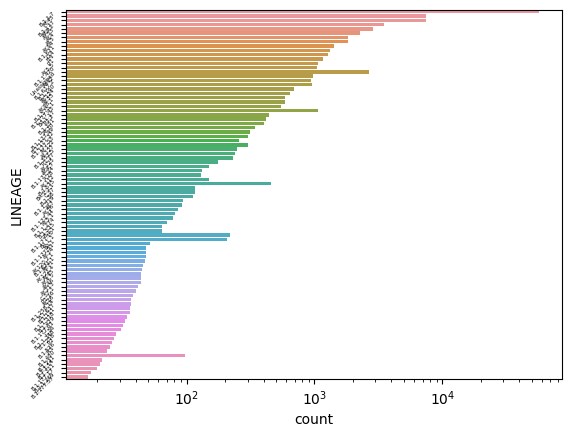

In [ ]:
ax = sns.countplot(data=merged_longtab, y="LINEAGE", order = longtab_mad07_filt['LINEAGE'].value_counts().index)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)
ax.set_xscale('log')